In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=9
paper='2004.04168'

# Code-generation prompts

In [52]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
`
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relev

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's
Let's break down the given Hamiltonian step by step to answer the questions:

The Hamiltonian consists of three parts:
1. Kinetic part: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
2. Hartree part: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock part: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

There are also definitions for the energy dispersion and interaction potential:
- $E_s(k) = \sum_{n} t_s(n) e^{-i k \cdot n}$
- $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Where $t_s(n)$ is the hopping amplitude to the n-th neighbor for spin s, and $U(n)$ is the interaction potential for the n-th neighbor.

Now let's tackle the questions:

### QUESTION 1: Dimension and Basis Order

In the Hamiltonian, the operators ar

In [7]:
print(generated_code['thinking'])

Let's break down the given Hamiltonian step by step to answer the questions:

The Hamiltonian consists of three parts:
1. Kinetic part: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
2. Hartree part: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock part: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

There are also definitions for the energy dispersion and interaction potential:
- $E_s(k) = \sum_{n} t_s(n) e^{-i k \cdot n}$
- $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Where $t_s(n)$ is the hopping amplitude to the n-th neighbor for spin s, and $U(n)$ is the interaction potential for the n-th neighbor.

Now let's tackle the questions:

### QUESTION 1: Dimension and Basis Order

In the Hamiltonian, the operators are indexed by spin (s) and momentum (k). There are no other 

In [8]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: spin_up, spin_down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "Average density of spin s at momentum k1",
    r"\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "Mixed spin expectation value at momentum k1"
}

TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[s, s, k], NI
- $U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k2], I (Hartree term)
- $-U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s', s, k2], I (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent hopping and
    distance-dependent interactions.
    
    Args:
        N_shell (int): Number of shells for the k-space grid.
        parameters (dict): Dictionary containing model parameters.

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent hopping and
    distance-dependent interactions.
    
    Args:
        N_shell (int): Number of shells for the k-space grid.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int=10, parameters: dict[str, Any]=None, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # LM Task: Tuple defining the number of spin flavors
        self.basis_order = {'0': 'spin'}  # Order: spin_up, spin_down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = 0  # Temperature set to 0
        
        if parameters is None:
            parameters = {
                'a': 1.0,        # Lattice constant
                't_up': 1.0,     # H

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_9.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

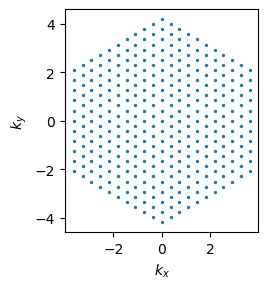

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Check energy dispersion for non-interacting term

In [18]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [21]:
ham = module.HartreeFockHamiltonian(N_shell=10,)
setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [22]:
h_nonint = ham.generate_non_interacting()

In [23]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

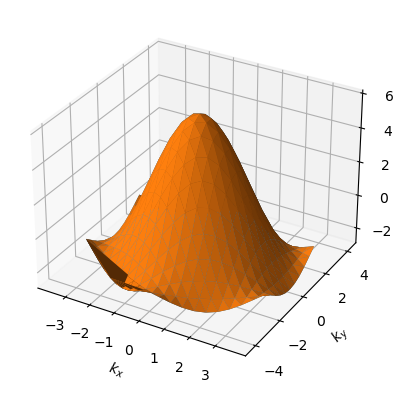

In [24]:
utils_auto.plot_2d_bandstructure(ham,en)

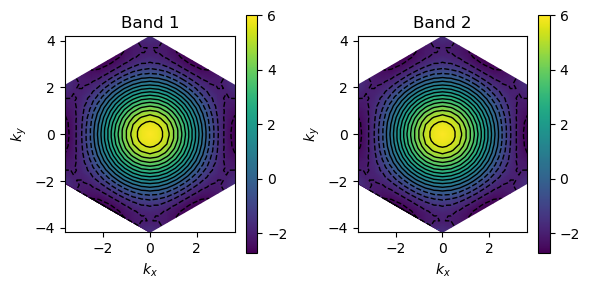

In [25]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Infinitesemial U limit

In [26]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [27]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [28]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

/mnt/d/Cornell/HartreeFock_GPT/test_coding/automation/2004_04168/code_2004_04168_9.py:142: ComplexWarning: Casting complex values to real discards the imaginary part
  U_k[i] += U_val * np.exp(-1j * np.dot(k, n_vector))


Convergence reached at iteration 1


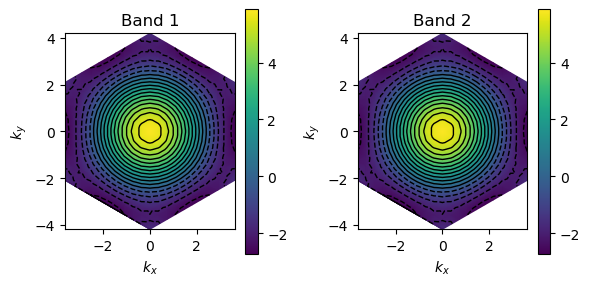

In [29]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Large U limit

In [30]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)

In [31]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [32]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


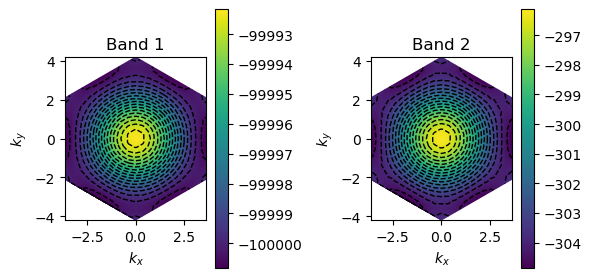

In [48]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [34]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 99687.31
U/T is 24623.05
mean_U is 25075.07


# Auto eval

## Task 1

In [35]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper='2004.04168')
    )


#################### THINKING ####################

Let's analyze this
Let's analyze this problem step by step based on the rubric.

The image shows a momentum space mesh in what appears to be the first Brillouin zone. I need to check if this correctly represents the first Brillouin zone of a triangular lattice and verify the point group symmetry.

For a 2D triangular lattice:
- The real space lattice vectors can be chosen as a₁ = a(1,0) and a₂ = a(1/2,√3/2), where a is the lattice constant
- The reciprocal lattice vectors would be b₁ = (2π/a)(1,-1/√3) and b₂ = (2π/a)(0,2/√3)
- The first Brillouin zone of a triangular lattice is a hexagon in k-space

Looking at the image:
1. The plot shows kx and ky axes with a hexagonal arrangement of points
2. The hexagon extends from approximately -4 to 4 in the ky direction and from about -3 to 3 in the kx direction
3. The points appear to be arranged in a regular pattern that fills the hexagonal region

Point group symmetry for a triangular latti

In [36]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [37]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper='2004.04168')
    )


#################### THINKING ####################

I'm being aske
I'm being asked to analyze an image showing band structure plots for a triangular lattice and evaluate whether they display the expected symmetries. Let me work through the rubric systematically:

1. Identify the shape of the Brillouin zone boundary:
   - In the image, I can see that the Brillouin zone has a hexagonal shape, which is indeed the expected shape for a triangular lattice in reciprocal space. This is correct.

2. Examine the symmetry of the energy distribution:

   2.1 Identify highest energy regions:
   - The highest energy regions (yellow) are at the center of both Band 1 and Band 2 plots, around k_x = 0, k_y = 0.

   2.2 Trace pattern of energy variation:
   - The energy decreases radially outward from the center in concentric, roughly circular contours that gradually take on a more hexagonal shape near the zone boundary.

   2.3 Determine rotational symmetries:
   - The energy contours appear to have 6-

In [38]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [39]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper='2004.04168')
    )


#################### THINKING ####################

Let
Let me analyze the image of the band structure plots according to the rubric.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.
   - The Brillouin zone shown in the plots is a hexagon, which is indeed the expected first Brillouin zone for a triangular lattice. This is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

   2.1 Identify the highest energy regions (yellow)
   - The highest energy regions (yellow) appear at the center of both plots (Band 1 and Band 2), around k_x = 0, k_y = 0.

   2.2 Trace the pattern of energy variation across the zone
   - The energy varies radially from the center in both plots, with concentric contours of decreasing energy (yellow→green→blue→purple) as we move outward from the center.

   2.3 Determine what rotational symmetries are present in this energy distribution
   - T

In [40]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [49]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper='2004.04168',U_int=1e5)
    )


#################### THINKING ####################

I
I need to analyze a false color plot showing the interacting-renormalized band structure after a self-consistent Hartree-Fock calculation for a triangular lattice. Let me work through the rubric items systematically.

1. First, identify the shape of the Brillouin zone boundary:
Looking at the images, I can see that each plot has a hexagonal boundary. This is indeed the expected shape for a Brillouin zone of a triangular lattice. The hexagonal boundary is shown clearly in both Band 1 and Band 2 plots.

2. Examining the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
In both bands, the highest energy region (yellow) is at the center of the Brillouin zone (around k_x = 0, k_y = 0).

2.2 Pattern of energy variation:
The energy decreases radially outward from the center in concentric patterns, with the lowest energies (dark purple) at the boundary of the Brillouin zone.

2.3 Rotational symmetries:
Looking at t

In [50]:
answer4=utils_auto.extract_result_content(result4['text'])

In [51]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '9' saved to final_answer.yaml
